This notebook demonstrates various data cleaning and visualization techniques. The goal is to prepare and analyze a dataset, focusing on uncovering insights through visual representations. The dataset has undergone several text and format cleaning steps, including the removal of unnecessary symbols, replacement of spaces with underscores, and conversion of date fields to DateTime format, among others.

Following the cleaning process, multiple visualizations were created to better understand key aspects of the data:

**Bar charts**: Showing the mean price per category and Displaying the distribution of apps by category.

**Interactive bubble chart**: Exploring the relationship between company size, number of reviews, category, and average rating.

**Pie charts**: Representing total reviews by category and Showing total installs by the top 10 categories.

**Barplot**:Depicting the number of free apps by category.

**Line chart**: Displaying the average installs per rating.

Finally, the notebook explores the research question: "Does having a more recently updated app increase the app rating?" A scatter plot with a linear trendline was generated to investigate this hypothesis.

Skills Highlight
This project utilized a variety of tools and libraries, including:

**Python** for scripting and overall data manipulation.

**Pandas** for data cleaning and preprocessing.

**Numpy** for numerical operations.

**Matplotlib and Seaborn** for creating static visualizations.

**Plotly** for interactive charts.

**Scipy.stats ** for statistical analysis.

This notebook uses a dataset that shows the Google Play store data for many different apps. This dataset was found on Kaggle.




In [ ]:
from google.colab import files

# This will open a file upload dialog
uploaded = files.upload()

Saving googleplaystore.csv to googleplaystore.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

# Replace 'your_file.csv' with the name of your file
df = pd.read_csv('/content/googleplaystore.csv')

# To display the first few rows of the CSV file
print(df.head())


                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

## Text Cleaning

In [ ]:
#Replacing Spaces with Underscore
df.columns = df.columns.str.replace(" ","_")

In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

In [ ]:
df.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,object
Content_Rating,object
Genres,object


In [ ]:
df.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content_Rating,1
Genres,0


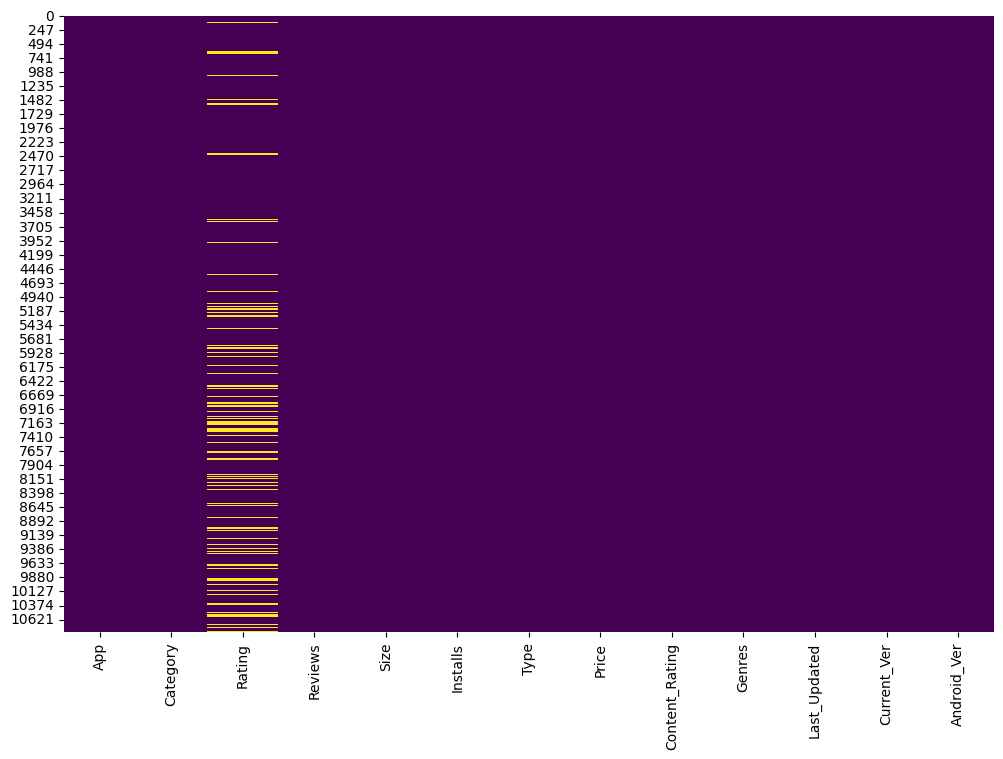

In [ ]:
#Created Heatmap With Missing Values

# Create a boolean dataframe where True indicates missing values
missing_data = df.isnull()

# Plot the heatmap of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(missing_data, cbar=False, cmap='viridis')

plt.show()


In [ ]:
#Droped The Missing Data
df.dropna(inplace=True)

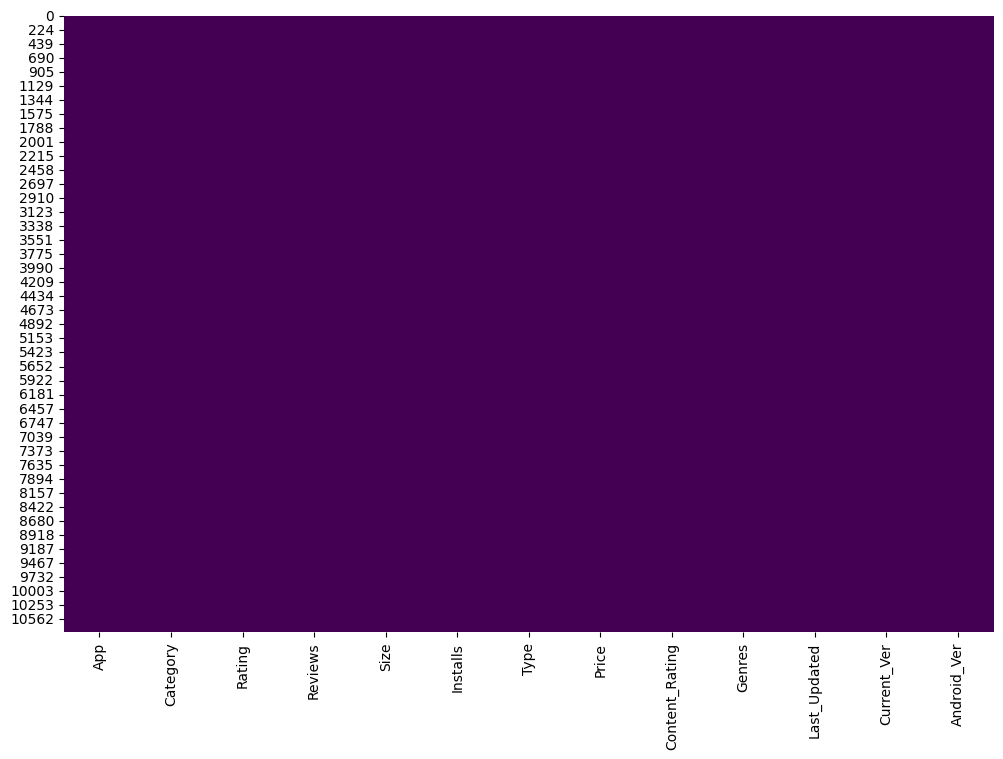

In [ ]:
#Created Heatmap to show that there are no more missing values

missing_data = df.isnull()

# Plot the heatmap of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(missing_data, cbar=False, cmap='viridis')

plt.show()


In [ ]:
#Changed Reviews from Object to Integer

df["Reviews"] = df["Reviews"].astype("int64")

In [ ]:
df["Reviews"].describe().round()

,Reviews
count,9360.0
mean,514377.0
std,3145023.0
min,1.0
25%,187.0
50%,5955.0
75%,81628.0
max,78158306.0


In [ ]:
print(len(df["Size"].unique()))
df["Size"].unique()

413


array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [ ]:
#Changed K to thousand integer and M to million integer


# Function to convert values to integers
def convert_to_int(value):
    if isinstance(value, str):
        value = value.strip()
        if value.endswith('M'):
            return int(float(value[:-1]) * 1_000_000)
        elif value.endswith('k'):
            return int(float(value[:-1]) * 1_000)
        elif value.isnumeric():  # Check if the value is purely numeric
            return int(value)
        else:
            return None  # Return None or another default value for non-numeric strings
    return value

# Apply the function to the 'Size' column
df['Size'] = df['Size'].apply(convert_to_int)

In [ ]:
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [ ]:
#Got Rid of Plus and Commas

df.Installs = df.Installs.apply(lambda x:x.replace("+",""))
df.Installs = df.Installs.apply(lambda x:x.replace(",",""))
df.Installs = df.Installs.apply(lambda x:int(x))

In [ ]:
df["Installs"].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1])

In [ ]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [ ]:
#Got Rid of Dollar Sign

df.Price = df.Price.apply(lambda x:x.replace("$",""))
df.Price = df.Price.apply(lambda x:float(x))

In [ ]:
df["Price"].unique()


array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

In [ ]:
# change the title of the "Price" column to "Price (In USD)"

df.rename(columns={"Price": "Price(USD)"}, inplace=True)


In [ ]:
df["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [ ]:
#Got rid of extra wording at the end of the Genre


df['Genres'] = df['Genres'].str.split(';').str[0]

df["Genres"].unique()




array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [ ]:
#Changed Last Updatd to Datetime Format

df["Last_Updated"] = pd.to_datetime(df["Last_Updated"])

In [ ]:
df["Last_Updated"].head()

,Last_Updated
0,2018-01-07
1,2018-01-15
2,2018-08-01
3,2018-06-08
4,2018-06-20


## Data Visualization

In [ ]:
!pip install plotly

Bar Chart Showing Mean Price Per Catagory

In [ ]:
# Import the necessary libraries
import plotly.graph_objects as go
import pandas as pd

# Load your data (replace this with your actual DataFrame loading step)
# df = pd.read_csv('your_data.csv')  # Uncomment if you're loading from a file

# Use the existing DataFrame 'df'
# df = pd.DataFrame(data)

# Calculate the mean price for each genre
mean_prices = df.groupby('Category')['Price(USD)'].mean().reset_index()

# Extracting data for plotting
genres = mean_prices['Category']
prices = mean_prices['Price(USD)']

# Create a bar chart
fig = go.Figure([go.Bar(x=genres, y=prices, marker_color='lightgreen', name='Mean Price')])

# Customize the chart layout
fig.update_layout(
    title="Mean Price by Category",
    xaxis_title="Category",
    yaxis_title="Mean Price ($)",
    plot_bgcolor='rgba(255, 255, 255, 0.9)',  # Chart background color
    paper_bgcolor='rgba(0, 0, 0, 0)',  # Fully transparent outer background
    font=dict(size=18),  # Font size for title and general text
    width=1200,  # Chart width
    height=800,  # Chart height
    margin=dict(l=50, r=50, t=100, b=100)  # Set margins
)

# Adjust axis label size and customize legend
fig.update_layout(
    xaxis=dict(
        title_font=dict(size=18),  # Axis title font size
        tickfont=dict(size=14)  # Axis tick label font size
    ),
    yaxis=dict(
        title_font=dict(size=18),  # Axis title font size
        tickfont=dict(size=14)  # Axis tick label font size
    ),
    legend=dict(
        title="Legend",  # Legend title
        x=1,  # Position the legend on the right side
        y=1,  # Position the legend at the top
        bordercolor="Black",
        borderwidth=1
    )
)

# Customize the bars
fig.update_traces(marker_line_color='black', marker_line_width=1.5)  # Outline the bars in black

# Show the chart
fig.show()


The chart shows that categories such as "Finance" and "Lifestyle" tend to have higher mean prices compared to categories like "Business" and "Sports." This indicates that certain specialized categories may have more premium-priced apps, possibly due to their niche audience.

Bar Chart Showing the Distribution of Apps by Category

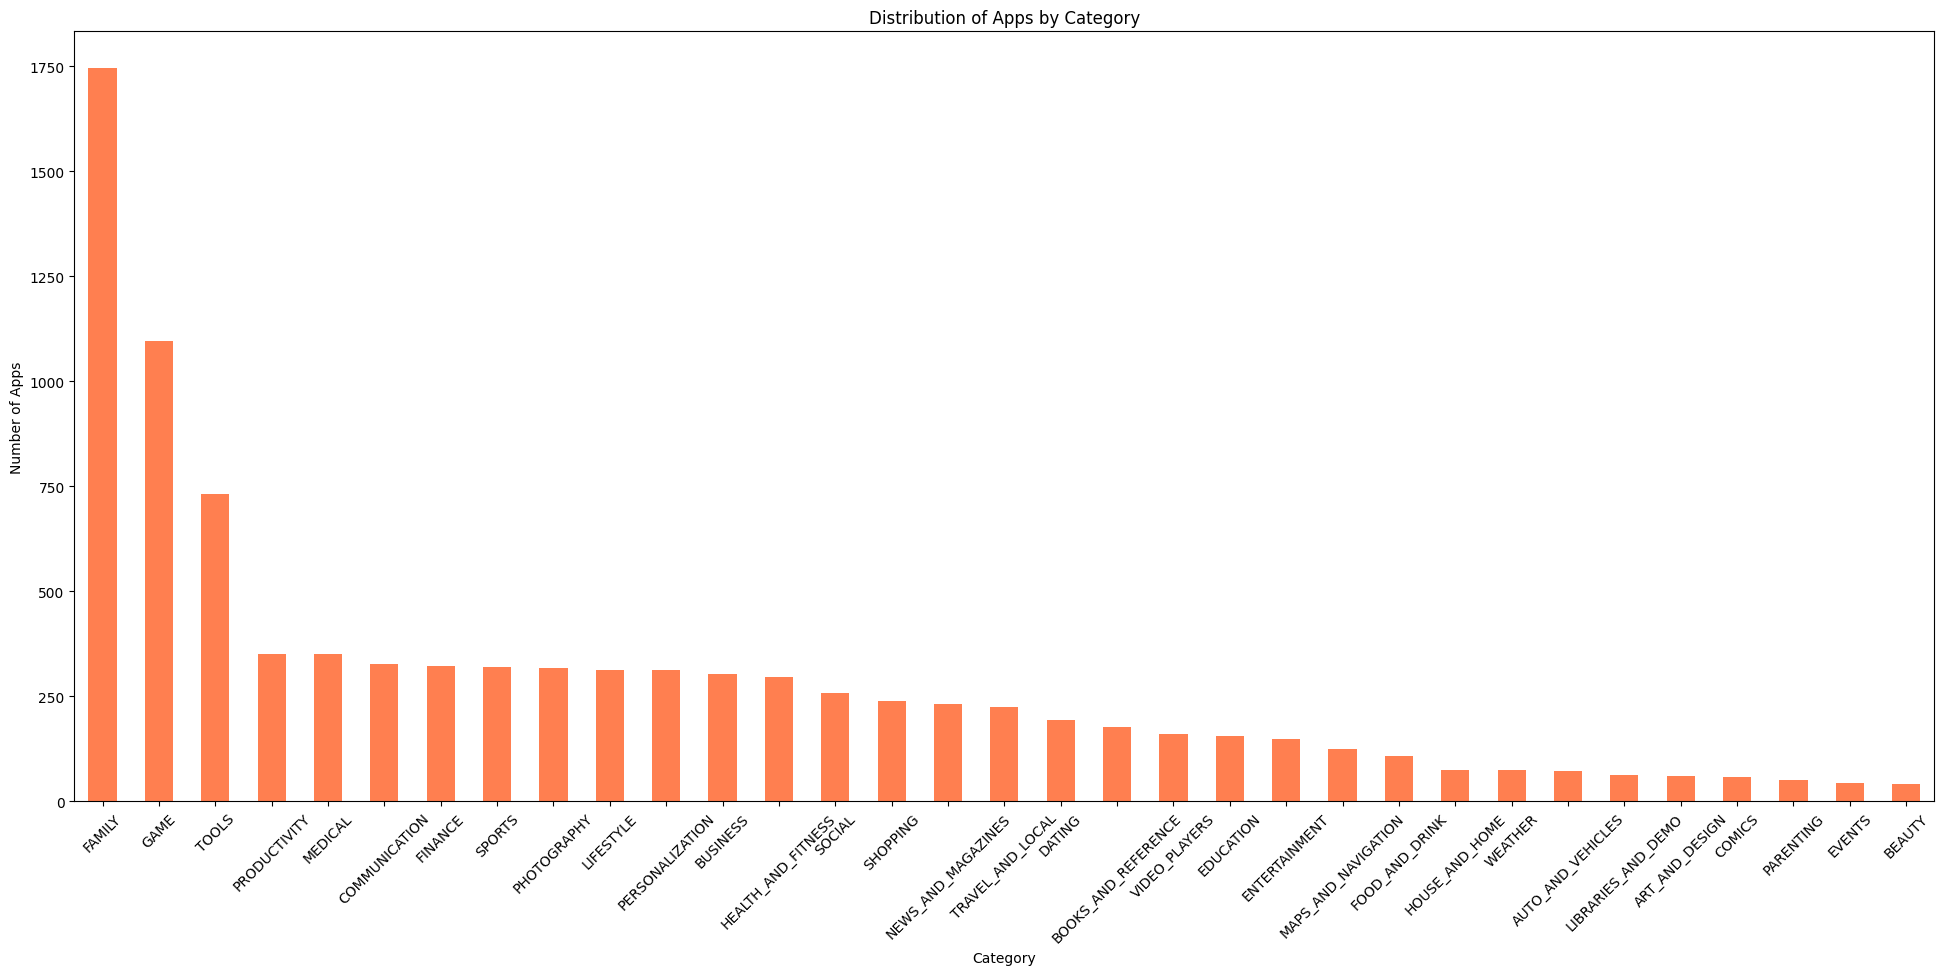

In [ ]:
import matplotlib.pyplot as plt

df['Category'].value_counts().plot(kind='bar', color='coral', figsize=(24,10))
plt.title('Distribution of Apps by Category')
plt.ylabel('Number of Apps')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()


The "Family" category dominates the distribution, indicating that it has the largest number of apps. Categories like "Game" and "Tools" also have significant numbers, suggesting that these sectors are competitive, with a wide range of app offerings available.



Interactive Consolidated Bubble Chart by Category Showing the relationship between the average size of the company, number of reviews, category, and rating received

In [ ]:
import plotly.express as px

# Group by Genre and calculate the required aggregations
df_grouped = df.groupby('Category').agg({
    'Installs': 'sum',   # Sum the installs
    'Rating': 'mean',    # Average the ratings
    'Reviews': 'sum'     # Sum the reviews
}).reset_index()

# Print the grouped data
print(df_grouped)

# Create the bubble chart
fig = px.scatter(df_grouped,
                 x='Installs',
                 y='Rating',
                 size='Reviews',
                 color='Category',
                 hover_name='Category',
                 title='Consolidated Bubble Chart by Category',
                 labels={'Installs': 'Total Installs', 'Rating': 'Average Rating'},
                 size_max=60)

# Show the plot
fig.show()

               Category     Installs    Rating     Reviews
0        ART_AND_DESIGN    124228100  4.377049     1714317
1     AUTO_AND_VEHICLES     53129800  4.190411     1163630
2                BEAUTY     26916200  4.278571      395133
3   BOOKS_AND_REFERENCE   1921291655  4.346067    21958660
4              BUSINESS   1001768120  4.121452    13954086
5                COMICS     56036100  4.155172     3381945
6         COMMUNICATION  32647241530  4.158537   815461799
7                DATING    264295110  3.970769     7291039
8             EDUCATION    871352000  4.389032    39595010
9         ENTERTAINMENT   2869160000  4.126174    59178154
10               EVENTS     15949410  4.435556      160590
11               FAMILY  10257651590  4.192383   410222902
12              FINANCE    876612400  4.131889    17550406
13       FOOD_AND_DRINK    273777750  4.166972     8883009
14                 GAME  35085862717  4.286326  1585419577
15   HEALTH_AND_FITNESS   1583056220  4.277104    378936

The bubble chart reveals that categories like "Games" and "Communication" have larger companies and a higher volume of reviews, while categories with smaller bubbles like "Education" still maintain high ratings, suggesting smaller companies can achieve high user satisfaction.

Pie Chart showing the Total Reviews by Category

In [ ]:
import pandas as pd
import plotly.express as px

# Step 1: Aggregate reviews by category
df_grouped = df.groupby('Category').agg({
    'Reviews': 'sum'
}).reset_index()

# Step 2: Sort the dataframe by reviews in descending order
df_sorted = df_grouped.sort_values(by='Reviews', ascending=False)

# Step 3: Select the top 10 categories and calculate the sum of "Other" categories
top_10 = df_sorted.head(10)
other = pd.DataFrame({
    'Category': ['Other'],
    'Reviews': [df_sorted['Reviews'][10:].sum()]  # Sum of all categories after the top 10
})

# Step 4: Combine the top 10 categories with the "Other" category
df_final = pd.concat([top_10, other])

# Step 5: Create the pie chart with hover info only
fig = px.pie(df_final,
             names='Category',
             values='Reviews',
             title='Total Reviews by Category (Top 10 with "Other")',
             hover_data={'Reviews': True},  # Show review count on hover
             labels={'Reviews': 'Total Reviews'})  # Labels for hover

# Step 6: Hide the percentage on the chart itself (shown only on hover)
fig.update_traces(textinfo='none')

# Step 7: Show the pie chart
fig.show()


The "Games" and "Communication" categories stand out with the largest share of total reviews, suggesting that these categories engage users the most, while categories like "Video_Players" and "Personalization" have fewer reviews.

Pie Chart Showing Total Installs by Top 10 Category



In [ ]:
import pandas as pd
import plotly.express as px

# Step 1: Group the data by category and sum installs
df_grouped = df.groupby('Category').agg({
    'Installs': 'sum'
}).reset_index()

# Step 2: Sort the categories by 'Installs' in descending order
df_grouped = df_grouped.sort_values(by='Installs', ascending=False)

# Step 3: Keep the top 10 categories
top_10_df = df_grouped.head(10)

# Step 4: Group the remaining categories into an "Other" category
other_df = df_grouped.iloc[10:]
other_total = other_df['Installs'].sum()

# Step 5: Add the "Other" category to the top 10 categories
# Use concat instead of append and create a new DataFrame for 'Other'
other_df = pd.DataFrame({'Category': ['Other'], 'Installs': [other_total]})
top_10_df = pd.concat([top_10_df, other_df], ignore_index=True)

# Step 6: Create the pie chart using Plotly with the "Other" category included
fig = px.pie(top_10_df,
             names='Category',
             values='Installs',
             title='Total Installs by Top 10 Categories (with Other)',
             hover_data={'Installs': True},  # Show total installs on hover
             labels={'Installs': 'Total Installs'})  # Labels for hover

# Hide the percentage on the chart itself (shown only on hover)
fig.update_traces(textinfo='none')

# Customize the chart's title and layout
fig.update_layout(
    title_font=dict(size=20, family='Arial', color='black'),  # Custom title font and size
    title_x=0.5,  # Center the title
    legend_title_text='Category',  # Add legend title
    legend=dict(
        orientation="v",  # Set vertical legend layout
        yanchor="top",
        y=0.95,
        xanchor="left",
        x=1.05  # Position legend outside the chart
    )
)

# Show the pie chart
fig.show()

"Games" is the dominant category, followed by "Communication." This highlights the high demand for gaming and communication apps among users, with these categories accounting for the majority of installs.



Barplot showing the Number of Free Apps by Category

<ipython-input-34-e60fe9a23c17>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




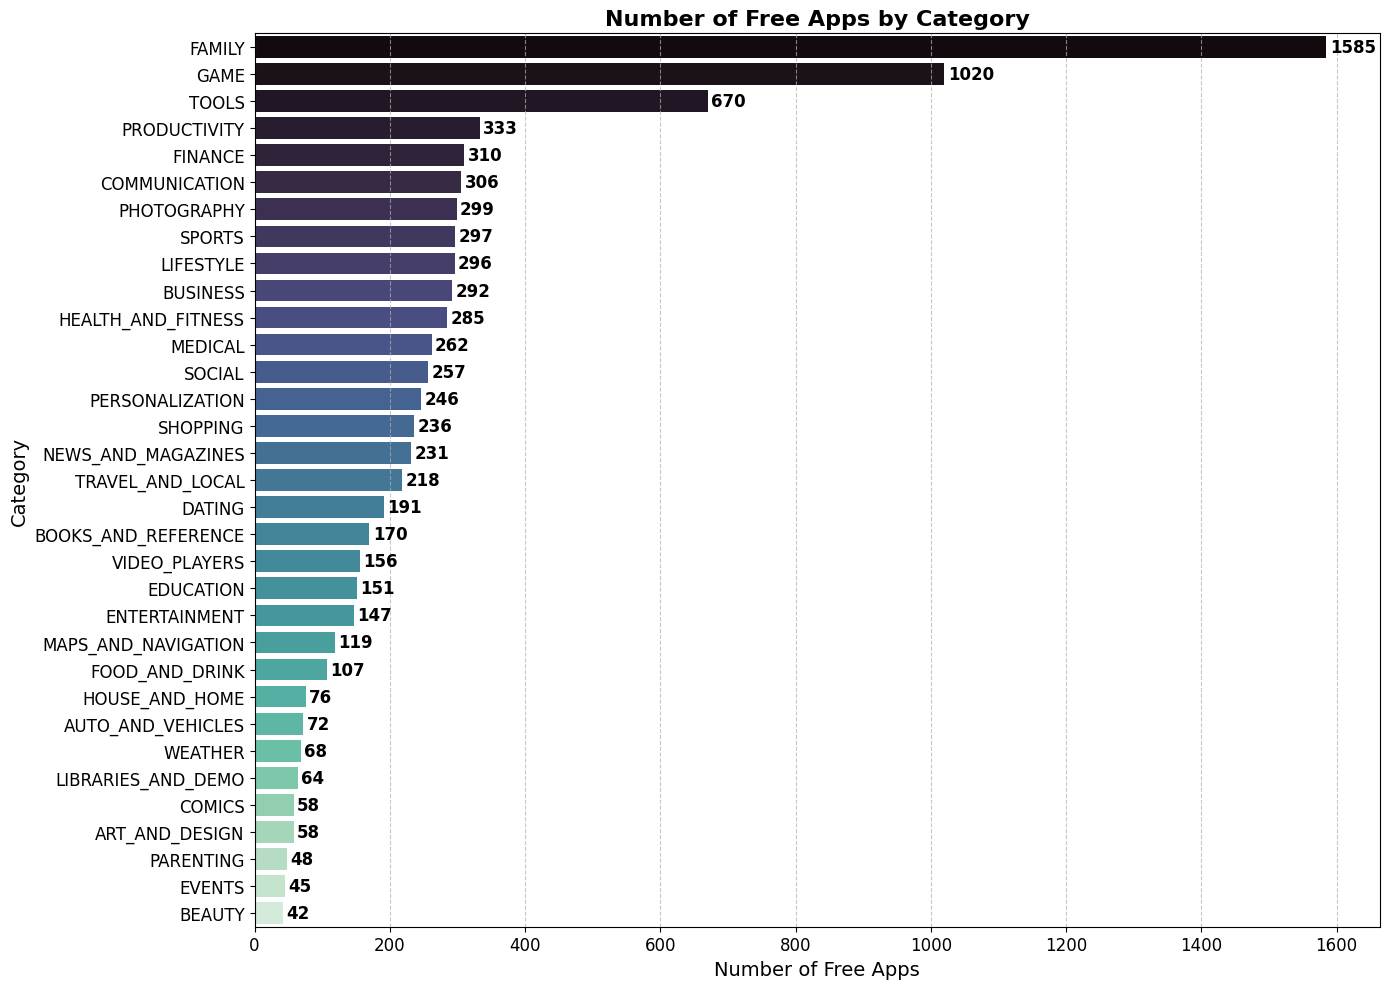

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is already loaded into a DataFrame called 'df'
# Step 1: Filter the free apps using the "Type" column
free_apps = df[df['Type'] == 'Free']

# Step 2: Group by 'Category' and count the number of free apps
category_count = free_apps['Category'].value_counts().sort_values(ascending=False)

# Step 3: Plot the data using Seaborn with enhanced visuals
plt.figure(figsize=(14, 10))

# Create the barplot with a color gradient
colors = sns.color_palette("mako", n_colors=len(category_count))  # Color palette
sns.barplot(x=category_count.values, y=category_count.index, palette=colors)

# Step 4: Add titles and labels
plt.title('Number of Free Apps by Category', fontsize=16, fontweight='bold')
plt.xlabel('Number of Free Apps', fontsize=14)
plt.ylabel('Category', fontsize=14)

# Step 5: Annotate the bars with the count values
for i, count in enumerate(category_count.values):
    plt.text(count + 5, i, str(count), va='center', fontsize=12, fontweight='bold', color='black')

# Step 6: Enhance the overall layout
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)  # Add a light grid for better readability
plt.tight_layout()

# Show the plot
plt.show()


The "Games" and "Family" categories offer the most free apps, reflecting the widespread adoption of the freemium model in these sectors. In contrast, categories like "Events" and "Beauty" have fewer free apps, possibly because they are more likely to charge for specialized services.

Line chart showing the Average Installs per Rating

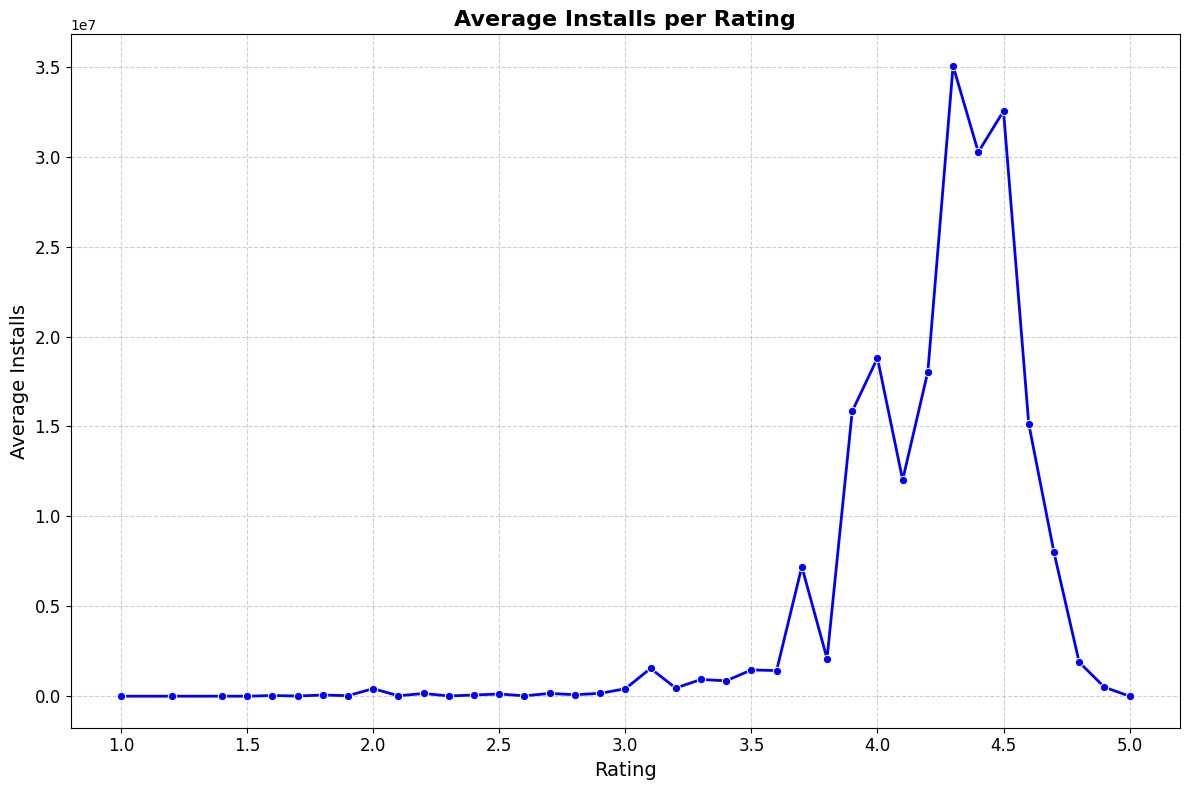

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Clean the 'Installs' column to convert it to numeric values
df['Installs'] = df['Installs'].astype(str)  # Ensure all values are strings
df['Installs'] = df['Installs'].str.replace(',', '')  # Remove commas
df['Installs'] = df['Installs'].str.replace('+', '')  # Remove '+' symbols
df['Installs'] = df['Installs'].str.replace('Free', '0')  # Replace 'Free' with '0'
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')  # Convert to numeric, coerce errors to NaN

# Step 2: Drop rows with missing or zero installs and ratings for a cleaner dataset
df_clean = df.dropna(subset=['Rating', 'Installs'])
df_clean = df_clean[df_clean['Installs'] > 0]

# Step 3: Group by 'Rating' and calculate the average installs
avg_installs_per_rating = df_clean.groupby('Rating')['Installs'].mean().reset_index()

# Step 4: Plot the data using Matplotlib/Seaborn
plt.figure(figsize=(12, 8))

# Plot a line graph for average installs per rating
sns.lineplot(x='Rating', y='Installs', data=avg_installs_per_rating, marker='o', color='b', linewidth=2)

# Step 5: Customize the plot
plt.title('Average Installs per Rating', fontsize=16, fontweight='bold')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Average Installs', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', axis='both', linestyle='--', alpha=0.6)  # Add gridlines

# Show the plot
plt.tight_layout()
plt.show()


There is a clear positive correlation between an app’s rating and its number of installs. Apps with higher ratings tend to receive more downloads, but after a certain threshold, the rate of increase slows and the trend even starts to decrease, suggesting that other factors may also influence download numbers.

## Research Question: Does a more recently updated app correlate to a higher rating.

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np

# Assuming your dataset is already loaded into a DataFrame called 'df'

# Step 1: Clean the 'Reviews' column to convert it to numeric values (if not already done)
df['Reviews'] = pd.to_numeric(df['Reviews'].astype(str).str.replace(',', ''), errors='coerce')

# Step 2: Group by 'Category' and calculate total reviews
total_reviews_per_category = df.groupby('Category')['Reviews'].sum().reset_index()

# Step 3: Get the top 10 categories by total reviews
top_10_categories = total_reviews_per_category.nlargest(10, 'Reviews')['Category'].values

# Step 4: Filter the original DataFrame to include only rows with top 10 categories
df_top_categories = df[df['Category'].isin(top_10_categories)]

# Step 5: Convert 'Last_Updated' to datetime if it is not already
df_top_categories['Last_Updated'] = pd.to_datetime(df_top_categories['Last_Updated'])

# Step 6: Calculate the line of best fit (linear regression) for the entire dataset
# Convert datetime to numeric (timestamp) for linear regression
df_top_categories['Last_Updated_numeric'] = df_top_categories['Last_Updated'].astype(np.int64) / 1e9  # Convert to seconds

# Calculate the slope and intercept for the line of best fit
slope, intercept = np.polyfit(df_top_categories['Last_Updated_numeric'], df_top_categories['Rating'], 1)

# Create values for the trendline
trendline_x = np.array([df_top_categories['Last_Updated_numeric'].min(), df_top_categories['Last_Updated_numeric'].max()])
trendline_y = slope * trendline_x + intercept

# Convert numeric dates back to datetime for plotting the trendline
trendline_x_dates = pd.to_datetime(trendline_x * 1e9)

# Step 7: Create the scatter plot with categories and overlay the trendline
fig = px.scatter(df_top_categories,
                 x='Last_Updated',   # X-axis: Date of last update
                 y='Rating',         # Y-axis: App rating
                 color='Category',   # Color points by category
                 hover_name='App',   # Display app name on hover
                 title='App Ratings vs Last Update Date for Top 10 Categories by Reviews',
                 labels={'Last_Updated': 'Last Updated', 'Rating': 'App Rating'},
                 opacity=0.7)        # Adjust opacity for better visibility

# Add the manually calculated trendline as a line trace
#The layer property is invalid.
fig.add_scatter(x=trendline_x_dates, y=trendline_y, mode='lines', name='Best Fit Line',
                line=dict(color='black', width=3))   # Make the line more prominent

# Show the plot
fig.show()

<ipython-input-36-12e6b43e8ac0>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-36-12e6b43e8ac0>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Performing a statistical significance and correlation test to confirm the correlation

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Sample data for demonstration purposes
# df = pd.read_csv('your_data.csv')  # Load your actual DataFrame here

# Step 1: Ensure 'Reviews' is a string (if necessary) before cleaning, then convert to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'].astype(str).str.replace(',', ''), errors='coerce')

# Step 2: Group by 'Category' and calculate total reviews
total_reviews_per_category = df.groupby('Category')['Reviews'].sum().reset_index()

# Step 3: Sort by reviews and get top 10 categories
top_10_categories = total_reviews_per_category.nlargest(10, 'Reviews')['Category']

# Step 4: Filter the original DataFrame to include only the top 10 categories
df_top_10 = df[df['Category'].isin(top_10_categories)]

# Step 5: Clean the 'Last_Updated' column (convert to datetime)
df_top_10['Last_Updated'] = pd.to_datetime(df_top_10['Last_Updated'], errors='coerce')

# Convert 'Last_Updated' to a numeric format (e.g., Unix timestamp)
df_top_10['Last_Updated_numeric'] = df_top_10['Last_Updated'].map(pd.Timestamp.timestamp)

# Step 6: Calculate correlation for each category
correlation_data = []
for category in top_10_categories:
    # Filter data for each category
    df_category = df_top_10[df_top_10['Category'] == category]

    # Calculate Pearson correlation between 'Last_Updated' and 'Rating'
    if len(df_category) > 1:  # Ensure there are enough data points
        corr, p_value = pearsonr(df_category['Last_Updated_numeric'], df_category['Rating'])
    else:
        corr, p_value = np.nan, np.nan  # Not enough data to calculate correlation

    # Append results to list
    correlation_data.append({
        'Category': category,
        'Correlation (R)': corr,
        'P-Value': p_value
    })

# Calculate correlation for 'All' categories
df_all = df_top_10.copy()  # Use the filtered DataFrame
if len(df_all) > 1:  # Ensure there are enough data points
    corr_all, p_value_all = pearsonr(df_all['Last_Updated_numeric'], df_all['Rating'])
else:
    corr_all, p_value_all = np.nan, np.nan  # Not enough data to calculate correlation

# Append 'All' category result
correlation_data.append({
    'Category': 'All',
    'Correlation (R)': corr_all,
    'P-Value': p_value_all
})

# Step 7: Convert correlation data to DataFrame and display
correlation_df = pd.DataFrame(correlation_data)
print(correlation_df)


           Category  Correlation (R)       P-Value
0              GAME         0.243626  2.756463e-16
1     COMMUNICATION         0.159440  3.790418e-03
2            SOCIAL         0.167564  6.876261e-03
3            FAMILY         0.146473  7.787560e-10
4             TOOLS         0.099400  7.076179e-03
5       PHOTOGRAPHY         0.192774  5.583023e-04
6          SHOPPING         0.128715  4.730947e-02
7      PRODUCTIVITY         0.202922  1.291460e-04
8     VIDEO_PLAYERS         0.222393  4.705981e-03
9   PERSONALIZATION         0.296804  9.171059e-08
10              All         0.167810  2.794495e-36


<ipython-input-37-02194e9fa3e9>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-37-02194e9fa3e9>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The trendline suggests a weak positive correlation between the date of the last update and the app rating. The high p-values suggest that this relationship may not be statistically significant. This implies that while there is some positive trend, the data may not provide enough evidence to conclude that more recent updates directly influence higher app ratings.

